# Z Peak Fitting

## Objective:

 - Measure fake rate by fitting Z peak in region A and B
 - Apply fake rate to control region D with inverse mass cut applied
 
 - fit background with generic function or template method
 - incorporate the fitter into fake rate code
 - **Problem**:
     - combinatorics for events with more than one photon
     - estimate the portion of photon objects that are in fact jet fakes



|          |  MET<25   |MET>25, inv Z cut  |
|----------|-----------|-----------|
|pass eVeto|A          |Signal     |
|fail eVeto|B          | D         |

### Sample Pre-selection
- Trigger: HLT_Ele27_eta2p1_WPTight_Gsf
- Overlap removal with dR<0.4, in the preference of muon over electron over photon over jets
- at least 1 photon object and only 1 electron object required
- no muons in sample
- cut-based working points
- photon: medium, pT>20  (15 in ntuple maker)
- electron: tight, pT>10
- muon: tight, pT> 25

### Signal region cuts (e channel)

 - photon pT > 50
 - inverse Z mass cut (Width?)
 - photon passing electron veto (Pixel Seed?)
 

### MC samples:
- ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/
- DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/ 

- [incomplete]

## Import Samples

In [1]:
cd /home/kakw/efake/WG_Analysis/Plotting

/home/kakw/efake/WG_Analysis/Plotting


In [2]:
 %run interactiveStackTree.py --baseDir /data/users/jkunkle/Resonances/LepGamma_elg_2018_03_28/  \
--samplesConf Modules/Resonance.py --xsFile cross_sections/photon15.py \
--lumi 35900. --treeName UMDNTuple/EventTree --fileName tree.root --jupyt --quiet
 # /data/users/jkunkle/Resonances/LepGamma_elg_2018_03_28/

Welcome to JupyROOT 6.10/05
-------------------------------------
 LOAD CROSS SECTION INFO
-------------------------------------
GJets_HT-600ToInf              xsec :     93.4 pb Nevent : 2463946  lumi : 2.64e+04 scale :     1.36
WZ3LNLO                        xsec :     5.26 pb Nevent : 8260201  lumi : 1.57e+06 scale :   0.0229
WJetsToLNu_HT-800To1200        xsec :     7.48 pb Nevent : 1544513  lumi : 2.06e+05 scale :    0.174
WJetsToLNu_HT-600To800         xsec :     16.3 pb Nevent : 3779141  lumi : 2.32e+05 scale :    0.155
GJets_HT-100To200              xsec : 9.23e+03 pb Nevent : 5131873  lumi :      556 scale :     64.5
ResonanceMass2000              xsec : 0.000172 pb Nevent : 50000    lumi :  2.9e+08 scale : 0.000124
TTJets_SingleLeptFromTbar      xsec :      179 pb Nevent : 46455353 lumi :  2.6e+05 scale :    0.138
GJets_HT-40To100               xsec : 2.07e+04 pb Nevent : 4467985  lumi :      216 scale :      167
ResonanceMass1000              xsec : 0.000748 pb Nevent : 5000

In [3]:
base = 'ph_n>=1 && el_n==1'
baseeta = base + ' && abs(ph_eta[0])<1.4'
base1 = 'ph_n==1 && el_n==1'
base1eta = base1 + ' && abs(ph_eta[0])<1.4'
a4 = '&& ph_hasPixSeed[0]==0'  #Pixel seed
b4 = '&& ph_hasPixSeed[0]==1'
ltmet = '&&met_pt<25'
gtmet = '&&met_pt>25'
phpt50 = "&&ph_pt[0]>50"

In [4]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(1)
samples.change_stack_order("GammaGamma","Wjets")

## Fill histogram

In [5]:
samples.Draw("m_lep_ph",base1eta+a4+ltmet+phpt50,(120,0,600),{"xlabel":"m(e,#gamma)","ymin":10,"logy":1, "blind":False});

Activate sample Z+jets
Activate sample Zgamma
m_lep_ph : ph_n==1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_hasPixSeed[0]==0&&met_pt<25&&ph_pt[0]>50
Creating hist for Data
Data  is DATA!!
0.04


### region A background contributions in e channel
 - control region background
 - Z+jets, Z$\gamma$, W$\gamma$, $\gamma\gamma$ included
 - requiring exactly 1 photon and 1 electron with photon pT >50GeV
 - plotting mass reconstructed from leading photon and leading electron
 - Good news: These two cuts combined have the effect of removing most of Zgamma events
 - Bad news: we see huge discrepency in the high mass tail
 

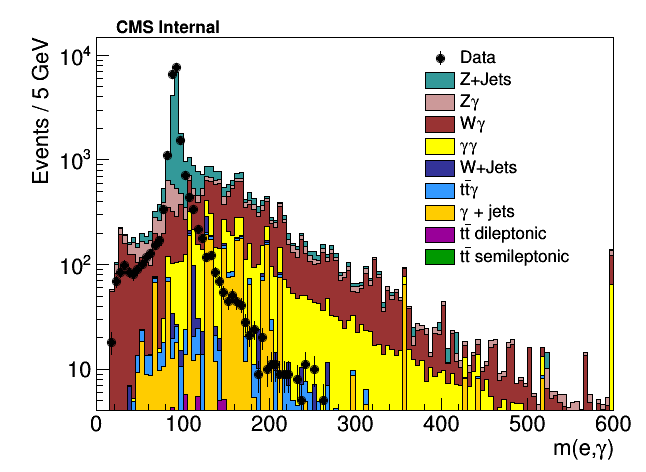

Info in <TCanvas::Print>: png file /tmp/tmpjsj2gu.png has been created


In [6]:
samples.curr_canvases["top"]

In [63]:
samples.deactivate_all_samples()
samples.activate_sample(["Z+jets","Zgamma","Wgamma","Data","GammaGamma"])
samples.Draw("m_lep_ph"," abs(ph_eta[0])>1.4 && met_pt<25",(120,0,600),{"xlabel":"m(e,#gamma)","logy":1,"ymin":10,"blind":False});

Activate sample Z+jets
Activate sample Zgamma
Activate sample Wgamma
Activate sample Data
Activate sample GammaGamma
m_lep_ph :  abs(ph_eta[0])>1.4 && met_pt<25
removing sample __AllStack__
Creating hist for Data
Data  is DATA!!
0.04


### photon eta > 1.4 -- OK

- we used to check this distribution, but without photon eta requirement. With endcap photons, the distributions match.

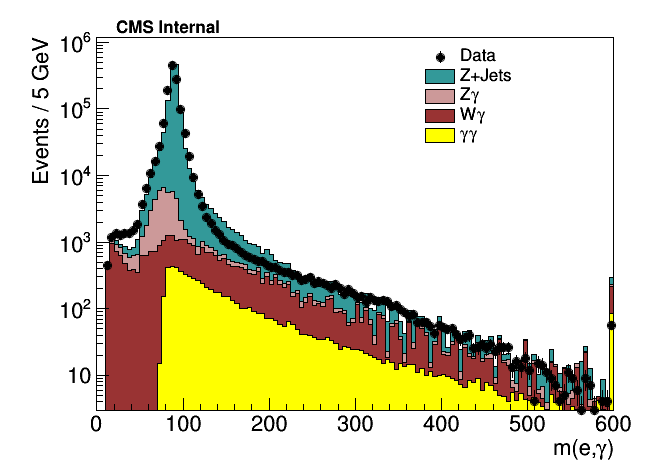

Info in <TCanvas::Print>: png file /tmp/tmpIPSVJx.png has been created


In [64]:
samples.curr_canvases["top"]

In [38]:
samples.deactivate_all_samples()
samples.activate_sample(["Z+jets","Zgamma","Wgamma","Data","GammaGamma"])
samples.Draw("m_lep_ph"," ph_n>0 && abs(ph_eta[0])<1.4 && met_pt<25",(120,0,600),{"xlabel":"m(e,#gamma)","logy":1,"ymin":10,"blind":False});

Activate sample Z+jets
Activate sample Zgamma
Activate sample Wgamma
Activate sample Data
Activate sample GammaGamma
m_lep_ph :  ph_n>0 && abs(ph_eta[0])<1.4 && met_pt<25
removing sample __AllStack__
Creating hist for Data
Data  is DATA!!
0.04


### photon eta less than 1.4

- the largest discrepency occurs when photon lands in the barrel
- Note that:
    - gammagamma: one of the two photon fakes an electron
    - Wgamma: MET is mismeasured in this sample, but otherwise no fakes
    - Z+jets: electron faking photon

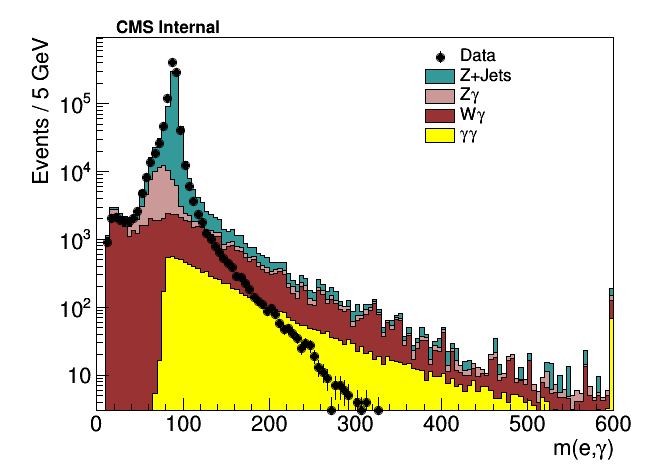

Info in <TCanvas::Print>: png file /tmp/tmpzDKK4Y.png has been created


In [39]:
samples.curr_canvases["top"]

In [ ]:
samples.deactivate_all_samples()
samples.activate_sample(["Z+jets","Zgamma","Wgamma","Data","GammaGamma"])
samples.Draw("ph_pt[0]"," abs(ph_eta[0])<1.4 && met_pt<25",(120,0,600),{"xlabel":"p_{T}(#gamma)","logy":1,"ymin":10,"blind":False});

### photon pT with photon |eta|<1.4 requirement

 - difference between data and MC is less than an order of magnitude 

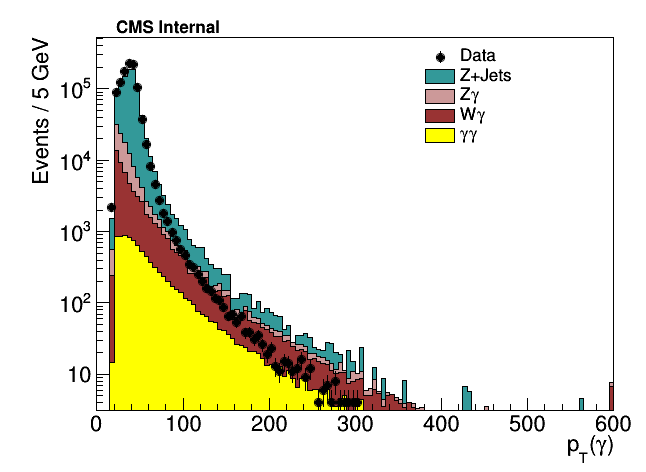

Info in <TCanvas::Print>: png file /tmp/tmpxM8XLQ.png has been created


In [43]:
samples.curr_canvases["top"]

In [13]:
samples.deactivate_all_samples()
samples.activate_sample(["Z+jets","Zgamma","Wgamma","Data","GammaGamma"])
samples.Draw("el_pt[0]"," abs(ph_eta[0])<1.4 && met_pt<25",(120,0,600),{"xlabel":"p_{T}(e)","logy":1,"ymin":10,"blind":False});

Activate sample Z+jets
Activate sample Zgamma
Activate sample Wgamma
Activate sample Data
Activate sample GammaGamma
el_pt[0] :  abs(ph_eta[0])<1.4 && met_pt<25
removing sample __AllStack__
Creating hist for Data
Data  is DATA!!
0.04


### electron pT with requiring photon |eta| < 1.4  
- electron pT looks fine as well

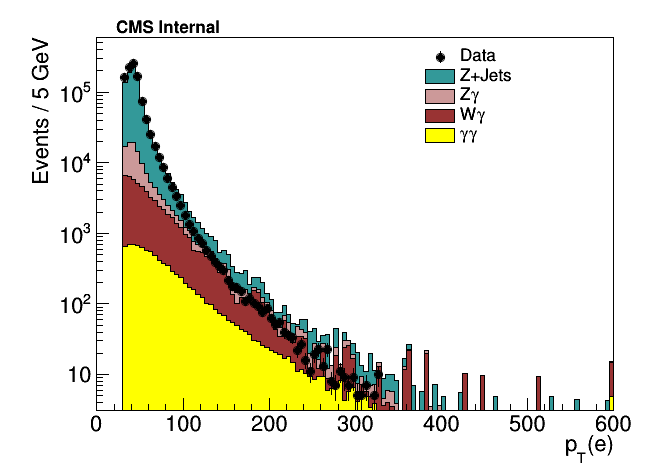

Info in <TCanvas::Print>: png file /tmp/tmpXI1Ffq.png has been created


In [14]:
samples.curr_canvases["top"]

In [69]:
samples.deactivate_all_samples()
samples.activate_sample(["Z+jets","Zgamma","Wgamma","Data","GammaGamma"])
samples.Draw("ph_eta[0]","met_pt<25  && m_lep_ph>250",(100,-4,4),{"xlabel":"ph eta","logy":1,"ymax":1e7,"blind":False});

Activate sample Z+jets
Activate sample Zgamma
Activate sample Wgamma
Activate sample Data
Activate sample GammaGamma
ph_eta[0] : met_pt<25  && m_lep_ph>250
removing sample __AllStack__
Creating hist for Data
Data  is DATA!!
0.04


## photon eta distribution in high mass tail

 - MC has a flat distribution in eta, whereas Data tends to the beampipe

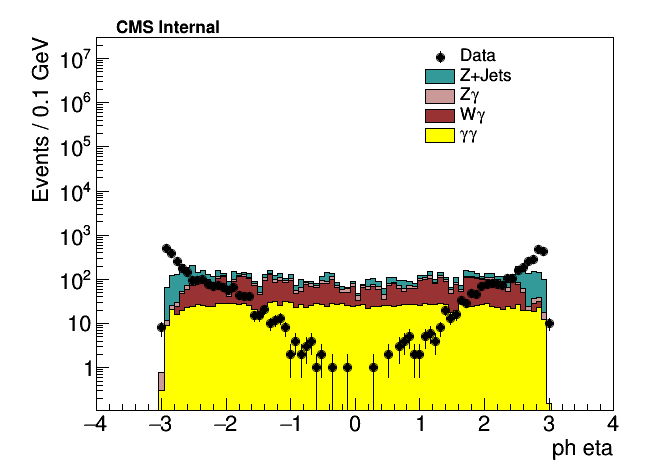

Info in <TCanvas::Print>: png file /tmp/tmplWf2Ex.png has been created


In [70]:
samples.curr_canvases["top"]

#   

#   

#   

#   

# BACKUP

#   


In [87]:
samples.Draw("ph_pt[0]"," abs(ph_eta[0])<1.4 && met_pt<25  && m_lep_ph>200",(120,0,600),{"xlabel":"p_{T}(e)","logy":1,"ymin":10,"blind":False});

Activate sample Z+jets
Activate sample Zgamma
Activate sample Wgamma
Activate sample Data
Activate sample GammaGamma
ph_pt[0] :  abs(ph_eta[0])<1.4 && met_pt<25  && m_lep_ph>200
removing sample __AllStack__
Creating hist for Data
Data  is DATA!!
0.04


### photon pT requiring photon |eta| < 1.4  and m(e,g)>200GeV

- photon objects in Data tends to the beampipe and leaves  tranverse energy behind

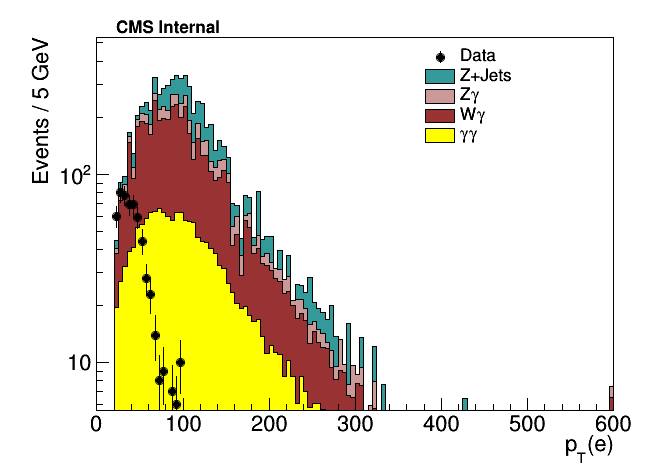

Info in <TCanvas::Print>: png file /tmp/tmpPIRsT6.png has been created


In [88]:
samples.curr_canvases["top"]

In [111]:
samples.Draw("ph_e[0]"," abs(ph_eta[0])<1.4 && met_pt<25  && m_lep_ph>200",(120,0,600),{"xlabel":"p(#gamma)","logy":1,"ymin":10,"blind":False});

ph_e[0] :  abs(ph_eta[0])<1.4 && met_pt<25  && m_lep_ph>200
removing sample __AllStack__
Creating hist for Data
Data  is DATA!!
0.04


## photon momentum requiring photon |eta| < 1.4  and m(e,g)>200GeV


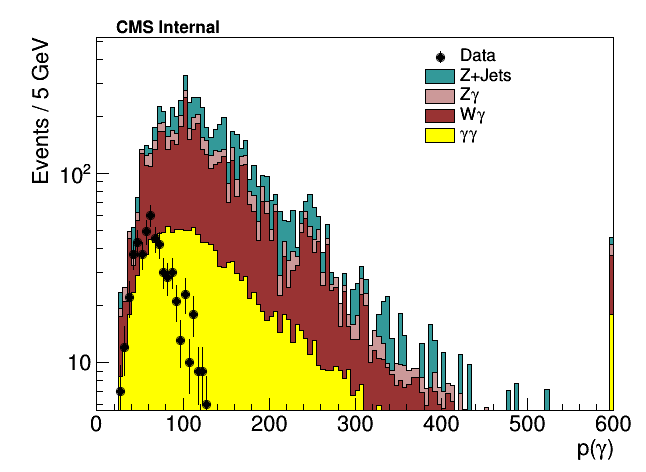

Info in <TCanvas::Print>: png file /tmp/tmpc3RWEa.png has been created


In [112]:
samples.curr_canvases["top"]

In [109]:
samples.Draw("ph_pt[0]*cosh(ph_eta[0])"," abs(ph_eta[0])<1.4 && met_pt<25",(120,0,600),{"xlabel":"p(#gamma)","logy":1,"ymin":10,"blind":False});

ph_pt[0]*cosh(ph_eta[0]) :  abs(ph_eta[0])<1.4 && met_pt<25
removing sample __AllStack__
Creating hist for Data
Data  is DATA!!
0.04


## photon momentum requiring photon |eta| < 1.4


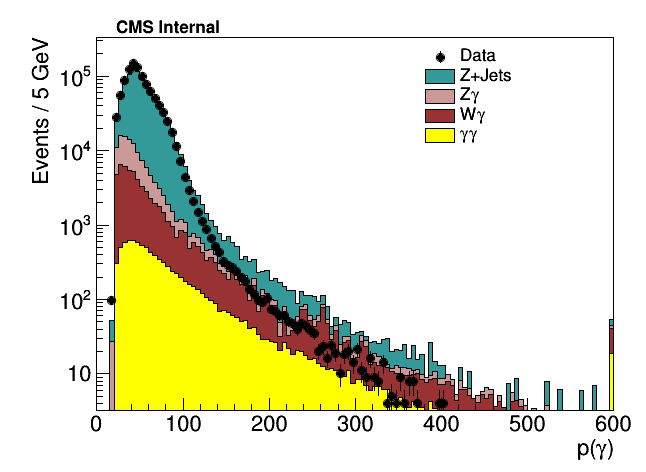

Info in <TCanvas::Print>: png file /tmp/tmpYSIsyO.png has been created


In [110]:
samples.curr_canvases["top"]

In [105]:
samples.Draw("m_lep_ph"," ph_n>0 && abs(ph_eta[0])<1.4 && met_pt<25"+b4,(120,0,600),{"xlabel":"m(e,#gamma)","logy":1,"blind":False});

m_lep_ph :  ph_n>0 && abs(ph_eta[0])<1.4 && met_pt<25&& ph_hasPixSeed[0]==1
removing sample __AllStack__
Creating hist for Data
Data  is DATA!!
0.04


### photon eta less than 1.4
- region D: MET>25 cut and leading photon failing electron veto
- it seems there is less discrepency 

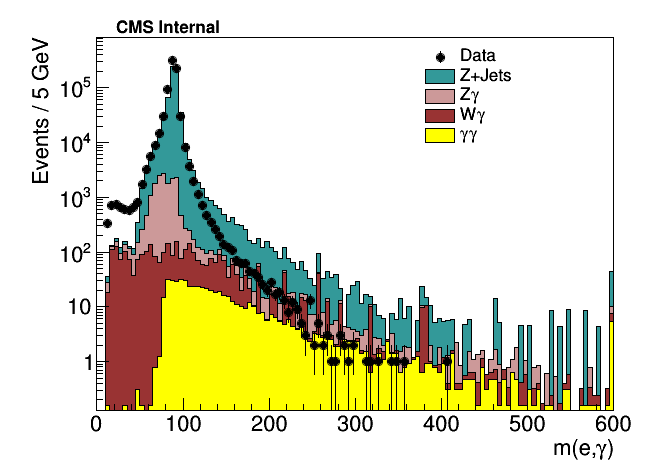

Info in <TCanvas::Print>: png file /tmp/tmpA9dAb_.png has been created


In [106]:
samples.curr_canvases["top"]

In [93]:
samples.deactivate_all_samples()
samples.activate_sample(["Z+jets","Zgamma","Wgamma","Data","GammaGamma"])
samples.Draw("dphi_lep_ph"," abs(ph_eta[0])<1.4 && met_pt<25 ",(50,-3.1416,3.1416),\
             {"xlabel":"d#phi(e, #gamma)","logy":1,"ymin":20,"ymax":1e6,"blind":False});

Activate sample Z+jets
Activate sample Zgamma
Activate sample Wgamma
Activate sample Data
Activate sample GammaGamma
dphi_lep_ph :  abs(ph_eta[0])<1.4 && met_pt<25 
removing sample __AllStack__
Creating hist for Data
Data  is DATA!!
0.04


## electron photon signed phi difference 

- requiring photon |eta| < 1.4  

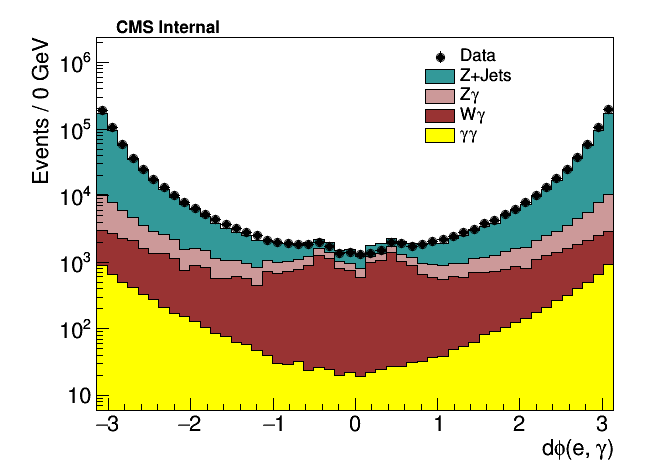

Info in <TCanvas::Print>: png file /tmp/tmpCJMdvJ.png has been created


In [94]:
samples.curr_canvases["top"]

In [23]:
samples.Draw("dr_lep_ph"," abs(ph_eta[0])<1.4 && met_pt<25",(50,0,4),{"xlabel":"dR(e, #gamma)","logy":1,"ymin":100,"ymax":1e7,"blind":False});

dr_lep_ph :  abs(ph_eta[0])<1.4 && met_pt<25
removing sample __AllStack__
Creating hist for Data
Data  is DATA!!
0.04


## electron photon deltaR

- requiring photon |eta| < 1.4  

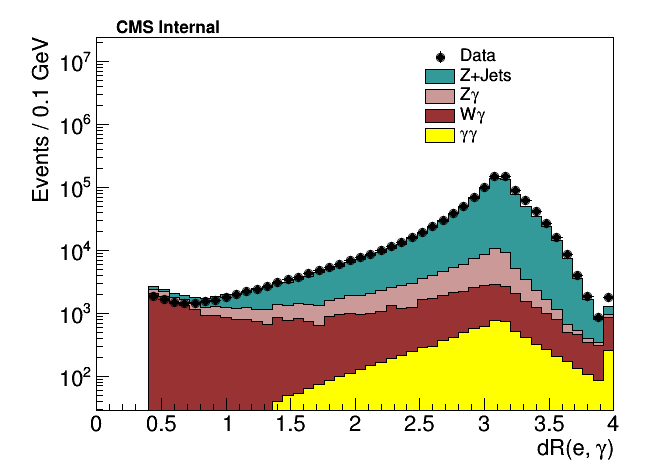

Info in <TCanvas::Print>: png file /tmp/tmppkZnaJ.png has been created


In [24]:
samples.curr_canvases["top"]

## photon eta distribution in low mass 

 - ??? \

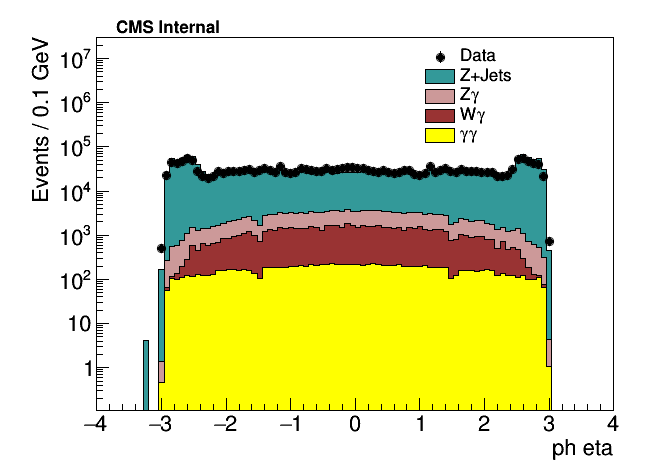

Info in <TCanvas::Print>: png file /tmp/tmpXKjcXs.png has been created


In [84]:
samples.curr_canvases["top"]

In [79]:
samples.deactivate_all_samples()
samples.activate_sample(["Z+jets","Zgamma","Wgamma","Data","GammaGamma"])
samples.Draw("el_pt[0]"," abs(ph_eta[0])<1.4 && met_pt<25  && m_lep_ph>200",(120,0,600),{"xlabel":"p_{T}(e)","logy":1,"ymin":10,"blind":False});

Activate sample Z+jets
Activate sample Zgamma
Activate sample Wgamma
Activate sample Data
Activate sample GammaGamma
el_pt[0] :  abs(ph_eta[0])<1.4 && met_pt<25  && m_lep_ph>200
removing sample __AllStack__
Creating hist for Data
Data  is DATA!!
0.04


## electron pT with requiring photon |eta| < 1.4  and m(e,g)>200GeV

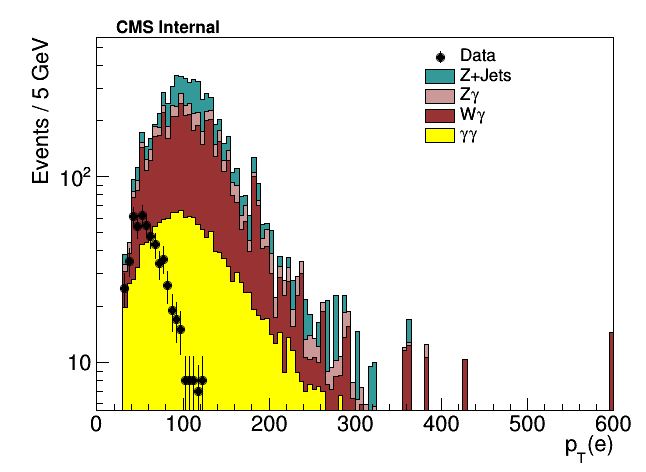

Info in <TCanvas::Print>: png file /tmp/tmp7DE1X4.png has been created


In [80]:
samples.curr_canvases["top"]

### all background contributions in e channel in signal region only
 - signal region only before applying inverse Z cut
 - requiring exactly 1 photon and 1 electron with photon pT >50GeV
 

In [11]:
samples.activate_sample("Z+jets")
samples.activate_sample("Zgamma")
samples.Draw("m_lep_ph",base1eta+a4+'&&met_pt>25&&ph_pt[0]>50',(150,0,600),{"xlabel":"m(e,#gamma)","logy":1,"ymin":30});

Activate sample Z+jets
Activate sample Zgamma
m_lep_ph : ph_n==1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_hasPixSeed[0]==0&&met_pt>25&&ph_pt[0]>50
removing sample __AllStack__
skipped  <Sample Data at 7f6fc07028c0>
0.04


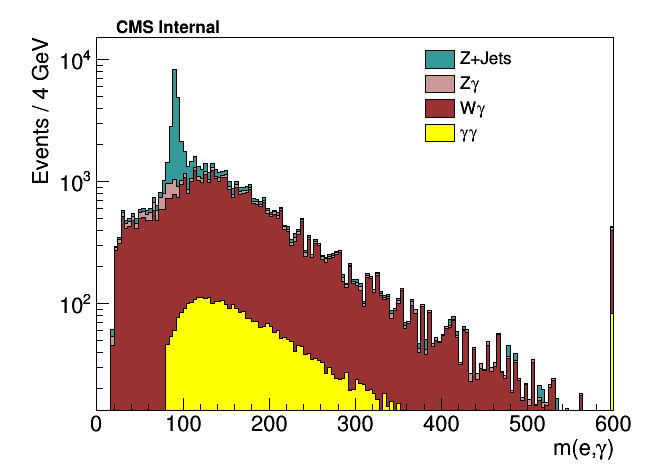

Info in <TCanvas::Print>: png file /tmp/tmpsIufbL.png has been created


In [12]:
samples.curr_canvases["top"]

### all background contributions in e channel in control region D only
 - MET>25,  photon failing eVeto (Pixel Seed)
 - requiring exactly 1 photon and 1 electron with photon pT >50GeV
 

In [13]:
samples.activate_sample("Z+jets")
samples.activate_sample("Zgamma")
samples.Draw("m_lep_ph",base1eta+b4+'&&met_pt>25&&ph_pt[0]>50',(150,0,600),{"xlabel":"m(e,#gamma)","logy":1,"ymin":30});

Activate sample Z+jets
Activate sample Zgamma
m_lep_ph : ph_n==1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_hasPixSeed[0]==1&&met_pt>25&&ph_pt[0]>50
removing sample __AllStack__
skipped  <Sample Data at 7f6fc07028c0>
0.04


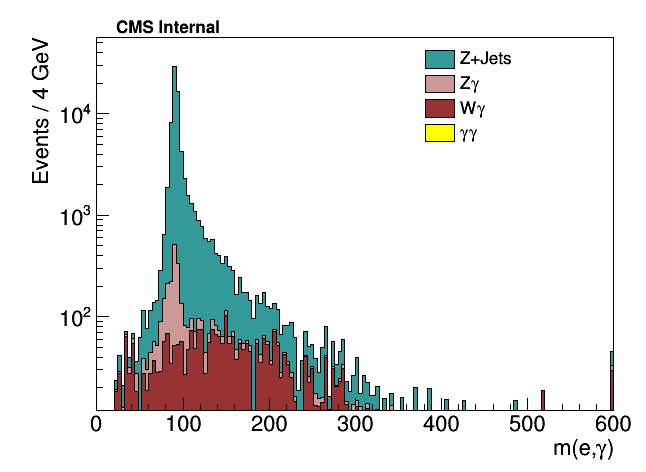

Info in <TCanvas::Print>: png file /tmp/tmpP2TpGc.png has been created


In [14]:
samples.curr_canvases["top"]

In [15]:
samples.deactivate_sample("Z+jets")

Deactivate sample Z+jets









### Fitting all background contributions

 - a gaussian is used for Zgamma peak
 - model flat background with a quadratic

In [18]:
h1 = samples.get_stack_aggregate()
h1.Draw()

In [20]:
samples.deactivate_sample("Zgamma")

Deactivate sample Zgamma


### What I did below
 - took out Zgamma (a major nuisance)
 - selecting photon pt > 40 (less bremsstrahlung events)
 - fit limit (only taking account of background > Z mass)

## next:

 - we obtain good normalization but the gaussian shape makes for a bad fit, especially on the tail
 - improving the fitter
     - fit background with generic function
     - possibility to use template for fitting Zgamma contribution
 - incorporate the fitter into fake rate code

### Using control region with failing eVeto
 - we could apply the fake rate on the shape region without regards to Z+jets contribution
 - there is no need to fit the tail there, so the above will apply only to region A,B where we measure fake rate
 - **Problem**: combinatorics for events with more than one photon
 - **Problem**: estimate the portion of photon objects that are in fact jet fakes

Kak Wong, 2018-09-13




### BACKUP



In [27]:
samples.activate_sample(["Z+jets","Zgamma"])
samples.Draw("ph_pt","ph_n>=1",(40,0,200),{"xlabel":"ph_pt","logy":1,"ymin":10});

Activate sample Z+jets
Activate sample Zgamma
ph_pt : ph_n>=1
removing sample __AllStack__
skipped  <Sample Data at 7f6fc07028c0>
0.04


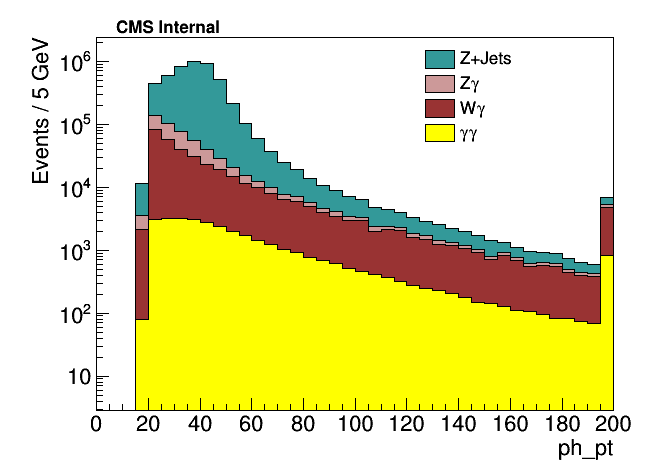

Info in <TCanvas::Print>: png file /tmp/tmpH1RHtr.png has been created


In [28]:
samples.curr_canvases["top"]